## Bengaluru House Price Predictive Model


In [55]:
# Import all the neccessary  libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")


from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error


## Read the data from the csv file

In [2]:
data = pd.read_csv("Bengaluru_House_Data.csv",encoding="latin-1")
data.head()

# Replace 'latin-1' with the actual encoding of your file if it's different from UTF-8. 
# Specifying the correct encoding should help to read the file without encountering the UnicodeDecodeError.


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07,NaN,NaN,NaN,NaN
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00,NaN,NaN,NaN,NaN
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00,NaN,NaN,NaN,NaN
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00,NaN,NaN,NaN,NaN
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00,NaN,NaN,NaN,NaN


### desccriptive analysis


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  object 
 9   Unnamed: 9    0 non-null      float64
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   0 non-null      float64
dtypes: float64(6), object(7)
memory usage: 1.3+ MB


In [4]:
data.describe()

,bath,balcony,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
count,13247.000000,12711.000000,0.0,0.0,0.0,0.0
mean,2.692610,1.584376,NaN,NaN,NaN,NaN
std,1.341458,0.817263,NaN,NaN,NaN,NaN
min,1.000000,0.000000,NaN,NaN,NaN,NaN
25%,2.000000,1.000000,NaN,NaN,NaN,NaN
50%,2.000000,2.000000,NaN,NaN,NaN,NaN
75%,3.000000,2.000000,NaN,NaN,NaN,NaN
max,40.000000,3.000000,NaN,NaN,NaN,NaN


In [5]:
data.describe(include='O')

,area_type,availability,location,size,society,total_sqft,price
count,13320,13320,13319,13304,7818,13320,13320
unique,4,81,1305,31,2688,2117,2205
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200,75
freq,8790,10581,540,5199,80,843,303


In [6]:
for col in data.columns:
    print(data[col].value_counts())

    print('*'*34)


Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
**********************************
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
**********************************
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
*************************

## Making the Dataset into correct format 

In [7]:
# In this Dataset Price is target variable, let's clean it
# all the special char in price variable
print(data.price.str.extract("([^\w\s])").value_counts())

# keep only numbers
data['Price'] = data.price.str.extract("(\d+)").astype(float)
data.Price.value_counts()



.    2522
?     202
     110
$      23
-       2
dtype: int64


65.0      333
75.0      331
55.0      321
45.0      301
60.0      300
         ... 
815.0       1
2250.0      1
369.0       1
343.0       1
488.0       1
Name: Price, Length: 485, dtype: int64

In [8]:
# availability feature overview
data.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [9]:
# Extract month from availability column
data['availability'] = data['availability'].str.extract(r'(\w{3,})')

In [10]:
# see the uniqueness in the data
print(data['size'].unique())

# extracting the size of the BHK and Bedroom
data['size'] = data['size'].str.split().str.get(0).astype(float)

['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' nan '9 Bedroom' '27 BHK'
 '10 Bedroom' '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom'
 '14 BHK' '8 BHK' '12 Bedroom' '13 BHK' '18 Bedroom']


In [11]:
# total sqft column have the '-' between the numeric values
print(data.total_sqft.unique())

# convert range number into mean and float
def sqft(s):
    temp = s.split(' - ')
    if len(temp)==2:
        return ((float(temp[0])+float(temp[1]))/2)
    try:
        return float(s)
    except:
        return None


data['total_sqft'] = data['total_sqft'].astype('str').apply(sqft)
print(data.total_sqft.unique())

['1056' '2600' '1440' ... '1133 - 1384' '774' '4689']
[1056.  2600.  1440.  ... 1258.5  774.  4689. ]


In [12]:
# removiing any extra space from location values
data['location'] = data['location'].astype('str').apply(lambda x: x.strip())

In [13]:
# analysing the location column
data.location.value_counts()

# total 1295 unique values,how many of them are smaller in count

Whitefield                            541
Sarjapur  Road                        399
Electronic City                       304
Kanakpura Road                        273
Thanisandra                           237
                                     ... 
1Channasandra                           1
Hosahalli                               1
Vijayabank bank layout                  1
near Ramanashree California resort      1
Abshot Layout                           1
Name: location, Length: 1295, dtype: int64

In [14]:
# if any value <= 9
loc= data.location.value_counts()

# there are total 1041 locations smaller in count
value_count_9 = loc[loc<9]

data['location'] = data['location'].apply(lambda x: 'other' if x in value_count_9 else x)
data['location'].value_counts()

other                2567
Whitefield            541
Sarjapur  Road        399
Electronic City       304
Kanakpura Road        273
                     ... 
Gollahalli              9
Kamakshipalya           9
Chandra Layout          9
Peenya                  9
Jakkur Plantation       9
Name: location, Length: 276, dtype: int64

<AxesSubplot:>

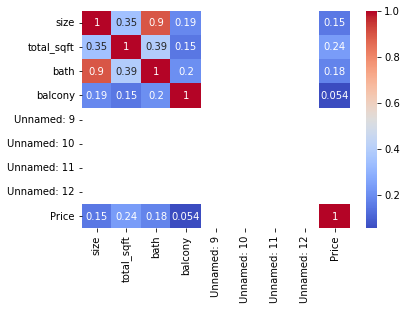

In [15]:
# check the correlation between the variables
sns.heatmap(data.corr(),annot=True, cmap='coolwarm')

In [16]:
# drop the null values 
print("before shape",data.shape)
data.drop(['price','bath','Unnamed: 12','Unnamed: 11', "Unnamed: 10","Unnamed: 9",'society','balcony'],axis=1, inplace=True)
print("after shape",data.shape)

before shape (13320, 14)
after shape (13320, 6)


<AxesSubplot:>

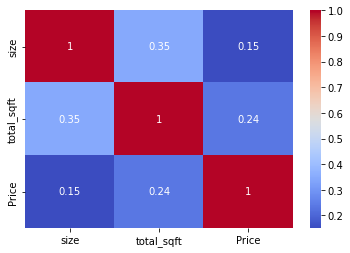

In [17]:

sns.heatmap(data.corr(),annot=True, cmap='coolwarm')

In [18]:
# data shape before the data
print("before the cleaning the duplicates",data.shape)
print("\n",data[data.duplicated()].count())
print("--"*39)

# removing duplicate values
data = data.drop_duplicates(keep="last")
print("data shape after duplicates removal", data.shape)


before the cleaning the duplicates (13320, 6)

 area_type       1063
availability    1063
location        1063
size            1063
total_sqft      1061
Price           1063
dtype: int64
------------------------------------------------------------------------------
data shape after duplicates removal (12257, 6)


## filling the missing values

In [19]:
data.isna().sum()

area_type        0
availability     0
location         0
size            16
total_sqft      44
Price            0
dtype: int64

##### Location

In [20]:
# check the number values repeated most of the time
# print(data.location.value_counts())

# location variable missing one value, which can be filled with mode
# data['location'] = data.location.fillna(data.location.mode()[0])

# check if any nnull value
# data.location.isna().sum()

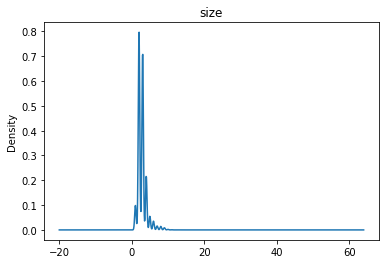

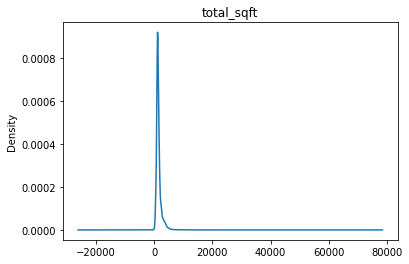

In [21]:
# data.balcony.plot.density()
# plt.title("Balconies")
# plt.show()

# df_random.Bedrooms.astype(float)
data['size'].plot.density()
plt.title("size")
plt.show()

data['total_sqft'].plot.density()
plt.title("total_sqft")
plt.show()

In [22]:
data.fillna({'size':data['size'].median(),
            #  'bath':data['bath'].median(),
             'total_sqft': data['total_sqft'].median()
          #    'balcony':data.balcony.median()
},inplace=True)

data.isna().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
Price           0
dtype: int64

In [23]:
# check the desccription of numerical data
data.describe([0.001,0.01, 0.1, 0.25, 0.5,0.75,0.95,0.99,0.999])

,size,total_sqft,Price
count,12257.000000,12257.000000,12257.000000
mean,2.828669,1580.460505,119.116015
std,1.324423,1279.003174,410.662841
min,1.000000,1.000000,8.000000
0.1%,1.000000,305.328000,11.000000
1%,1.000000,500.000000,19.000000
10%,2.000000,900.000000,38.000000
25%,2.000000,1100.000000,50.000000
50%,3.000000,1295.000000,74.000000
75%,3.000000,1700.000000,125.000000


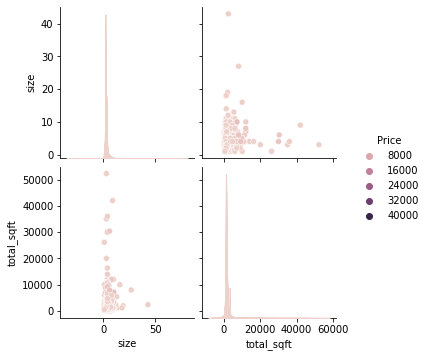

In [24]:
sns.pairplot(data=data,hue='Price')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12257 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12257 non-null  object 
 1   availability  12257 non-null  object 
 2   location      12257 non-null  object 
 3   size          12257 non-null  float64
 4   total_sqft    12257 non-null  float64
 5   Price         12257 non-null  float64
dtypes: float64(3), object(3)
memory usage: 670.3+ KB


# EDA

count    12257.000000
mean       119.116015
std        410.662841
min          8.000000
25%         50.000000
50%         74.000000
75%        125.000000
max      42278.000000
Name: Price, dtype: float64


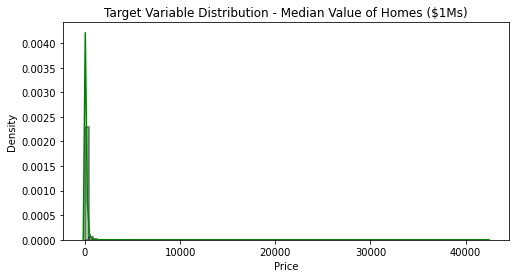

In [26]:
# thats clear that target column is right skewd
print(data.Price.describe())

#Let us first analyze the distribution of the target variable
plt.figure(figsize=[8,4])
sns.distplot(data['Price'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=100)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
# plt.xlim(-100,5000)
plt.show()

In [27]:
from scipy import stats
transformed_data, lambda_value = stats.boxcox(data['Price'])

print("Lambda value:", lambda_value)

# replace with original Price column
data['Price'] = transformed_data

Lambda value: -0.3097994367269413


### check the transformation

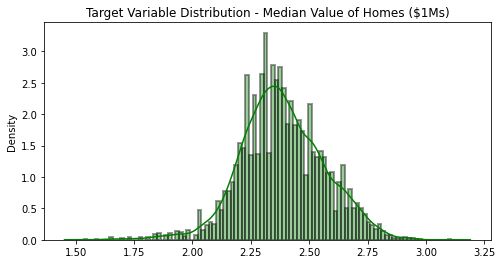

In [28]:
#Let us first analyze the distribution of the target variable
plt.figure(figsize=[8,4])
sns.distplot(transformed_data, color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=100)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
# plt.xlim(-100,5000)
plt.show()

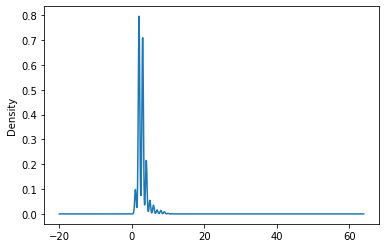

count    12257.000000
mean         2.828669
std          1.324423
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         43.000000
Name: size, dtype: float64

In [29]:
data['size'].plot.kde()
plt.show()
data['size'].describe()

count    12257.000000
mean      1580.460505
std       1279.003174
min          1.000000
25%       1100.000000
50%       1295.000000
75%       1700.000000
max      52272.000000
Name: total_sqft, dtype: float64

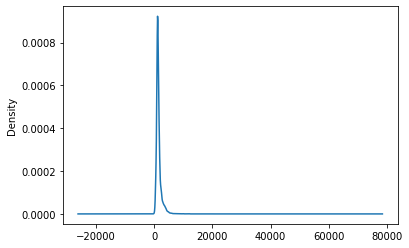

In [30]:
data.total_sqft.plot.kde()

data.total_sqft.describe()

In [31]:
data.reset_index(drop=True, inplace=True)

#  Seperate the X and Y variables
X= data.drop(['Price'],axis=1)
Y= data['Price']

In [32]:
data.head()

,area_type,availability,location,size,total_sqft,Price
0,Super built-up Area,Dec,Electronic City Phase II,2.0,1056.0,2.190346
1,Plot Area,Ready,Chikka Tirupathi,4.0,2600.0,2.495424
2,Built-up Area,Ready,Uttarahalli,3.0,1440.0,2.329148
3,Super built-up Area,Ready,Lingadheeranahalli,3.0,1521.0,2.440447
4,Super built-up Area,Ready,Kothanur,2.0,1200.0,2.273089


#### Outliers Treatment

In [33]:
num = X.select_dtypes('number')

# clip the outliers
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.001))
    x=x.clip(upper=x.quantile(0.999))
    return(x)


# capping and flooring of 0.1% ensures the minimal SD impact on the dataset
num=num.apply(lambda x : outlier_cap(x))  

# dataset after outlier Treatment
num.describe([0.001,0.01, 0.1, 0.25, 0.5,0.75,0.95,0.99,0.999])

,size,total_sqft
count,12257.000000,12257.000000
mean,2.813168,1541.293890
std,1.192891,810.306163
min,1.000000,500.000000
0.1%,1.000000,500.000000
1%,1.000000,500.000000
10%,2.000000,900.000000
25%,2.000000,1100.000000
50%,3.000000,1295.000000
75%,3.000000,1700.000000


In [34]:
x_all = pd.concat([num,data.select_dtypes('O')],axis=1, join="inner")
x_all

,size,total_sqft,area_type,availability,location
0,2.0,1056.0,Super built-up Area,Dec,Electronic City Phase II
1,4.0,2600.0,Plot Area,Ready,Chikka Tirupathi
2,3.0,1440.0,Built-up Area,Ready,Uttarahalli
3,3.0,1521.0,Super built-up Area,Ready,Lingadheeranahalli
4,2.0,1200.0,Super built-up Area,Ready,Kothanur
...,...,...,...,...,...
12252,5.0,3453.0,Built-up Area,Ready,Whitefield
12253,4.0,3600.0,Super built-up Area,Ready,other
12254,2.0,1141.0,Built-up Area,Ready,Raja Rajeshwari Nagar
12255,4.0,4689.0,Super built-up Area,Jun,Padmanabhanagar


### One Hot Encode

In [35]:
df = pd.get_dummies(x_all,drop_first=True)
df

,size,total_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Aug,availability_Dec,availability_Feb,availability_Immediate,availability_Jan,...,location_Vittasandra,location_Volagerekallahalli,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yemlur,location_Yeshwanthpur,location_other
0,2.0,1056.0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,2600.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,1440.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1521.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1200.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12252,5.0,3453.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
12253,4.0,3600.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12254,2.0,1141.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12255,4.0,4689.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Scale the data

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(df)

scaled_data = scaler.transform(df)

# create the dataframe  after scalling
scaled_data = pd.DataFrame(scaled_data, columns=df.columns)

# view the data
scaled_data

,size,total_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Aug,availability_Dec,availability_Feb,availability_Immediate,availability_Jan,...,location_Vittasandra,location_Volagerekallahalli,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yemlur,location_Yeshwanthpur,location_other
0,-0.681706,-0.598926,-0.084059,-0.429112,0.740925,-0.136748,4.303198,-0.077936,-0.036154,-0.096031,...,-0.043359,-0.023905,-0.208789,-0.040428,-0.130421,-0.057933,-0.031305,-0.027107,-0.08257,-0.493311
1,0.994961,1.306604,-0.084059,2.330396,-1.349664,-0.136748,-0.232385,-0.077936,-0.036154,-0.096031,...,-0.043359,-0.023905,-0.208789,-0.040428,-0.130421,-0.057933,-0.031305,-0.027107,-0.08257,-0.493311
2,0.156628,-0.125012,-0.084059,-0.429112,-1.349664,-0.136748,-0.232385,-0.077936,-0.036154,-0.096031,...,-0.043359,-0.023905,-0.208789,-0.040428,-0.130421,-0.057933,-0.031305,-0.027107,-0.08257,-0.493311
3,0.156628,-0.025046,-0.084059,-0.429112,0.740925,-0.136748,-0.232385,-0.077936,-0.036154,-0.096031,...,-0.043359,-0.023905,-0.208789,-0.040428,-0.130421,-0.057933,-0.031305,-0.027107,-0.08257,-0.493311
4,-0.681706,-0.421208,-0.084059,-0.429112,0.740925,-0.136748,-0.232385,-0.077936,-0.036154,-0.096031,...,-0.043359,-0.023905,-0.208789,-0.040428,-0.130421,-0.057933,-0.031305,-0.027107,-0.08257,-0.493311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12252,1.833295,2.359336,-0.084059,-0.429112,-1.349664,-0.136748,-0.232385,-0.077936,-0.036154,-0.096031,...,-0.043359,-0.023905,4.789515,-0.040428,-0.130421,-0.057933,-0.031305,-0.027107,-0.08257,-0.493311
12253,0.994961,2.540756,-0.084059,-0.429112,0.740925,-0.136748,-0.232385,-0.077936,-0.036154,-0.096031,...,-0.043359,-0.023905,-0.208789,-0.040428,-0.130421,-0.057933,-0.031305,-0.027107,-0.08257,2.027119
12254,-0.681706,-0.494023,-0.084059,-0.429112,-1.349664,-0.136748,-0.232385,-0.077936,-0.036154,-0.096031,...,-0.043359,-0.023905,-0.208789,-0.040428,-0.130421,-0.057933,-0.031305,-0.027107,-0.08257,-0.493311
12255,0.994961,3.884747,-0.084059,-0.429112,0.740925,-0.136748,-0.232385,-0.077936,-0.036154,-0.096031,...,-0.043359,-0.023905,-0.208789,-0.040428,-0.130421,-0.057933,-0.031305,-0.027107,-0.08257,-0.493311


### PCA

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=29)


# fit
pca.fit(scaled_data)

# tramsform
x_pca = pca.transform(scaled_data)

scaled_data.shape, x_pca.shape

((12257, 293), (12257, 29))

In [38]:
# split the data in train and test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled_data,Y,test_size=0.25,random_state=44)

In [39]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (9192, 293)
Shape of Testing Data (3065, 293)
Response Rate in Training Data 2.3863738350697217
Response Rate in Testing Data 2.3845040918095917


# Model Building

## LinearRegression model

In [44]:

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

# train the model
linear_model.fit(X_train,y_train)

# vlidate the model
linear_predict = linear_model.predict(X_test)

# check the performance of the Linear Regrssin model

r2_score(y_test,linear_predict)

# 0.466

0.7060929885440643

In [48]:
from sklearn.linear_model import Lasso
linear_model = Lasso()

# train the model
linear_model.fit(X_train,y_train)

# vlidate the model
linear_predict = linear_model.predict(X_test)

# check the performance of the Linear Regrssin model

r2_score(y_test,linear_predict)

# 0.444

-0.00011284630414953867

In [49]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [50]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)




def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared



mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
# print("-"*30)
# rmse_cross_val = rmse_cv(elastic_net)
# print("RMSE Cross-Validation:", rmse_cross_val)

# new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
# models = models.append(new_row, ignore_index=True)

MAE: 0.13664809124535407
MSE: 0.03098315349401896
RMSE: 0.17602032125302738
R2 Score: -0.00011284630414953867


## RandomForest model

In [51]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

MAE: 0.061639978409538464
MSE: 0.0076095649630771225
RMSE: 0.08723282044664796
R2 Score: 0.7543689774564581
------------------------------


## XGBRegressor model

In [52]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)


# MAE: 40.221019288105055,MSE: 89365.30760632151,RMSE: 298.94030776447914,R2 Score: -3.1183823471835277
# MAE: 0.06275539603832402,MSE: 0.007064704539339485,RMSE: 0.0840517967644921,R2 Score: 0.7719566613353094

MAE: 0.06275539603832402
MSE: 0.007064704539339485
RMSE: 0.0840517967644921
R2 Score: 0.7719566613353094


## SVR model

In [53]:
svr = SVR()
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)


# MAE: 34.276126084434814,MSE: 8149.088024091638,RMSE: 90.2722993176292,R2 Score: 0.6244509064758184


MAE: 0.07392006257962747
MSE: 0.010502604813342843
RMSE: 0.10248221705907247
R2 Score: 0.6609838312453366
------------------------------


# LightGBM model

In [54]:
import lightgbm as lgb

# Define the params for gbm
params = {
    'objective': 'regression',
    'metric': 'mse',
    # Add other parameters as per your requirement
}

# create lightgbm train and test
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# train the gbm
model = lgb.train(params, train_data, num_boost_round=100)

# Make prediction
y_pred = model.predict(X_test)


mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

# MAE: 0.06159028696466234,MSE: 0.00699941289600708,RMSE: 0.08366249396239082,R2 Score: 0.7740642263791857

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 633
[LightGBM] [Info] Number of data points in the train set: 9192, number of used features: 125
[LightGBM] [Info] Start training from score 2.386374
MAE: 0.06159028696466234
MSE: 0.00699941289600708
RMSE: 0.08366249396239082
R2 Score: 0.7740642263791857
